In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import math

In [2]:
# List of 50 stocks
tickers = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "NVDA", "META", "BRK-B", "JPM", "V",
    "UNH", "JNJ", "XOM", "PG", "HD", "MA", "CVX", "ABBV", "PEP", "LLY",
    "KO", "MRK", "AVGO", "COST", "MCD", "TMO", "DIS", "CSCO", "ACN", "AMD",
    "CMCSA", "ADBE", "NFLX", "PFE", "DHR", "NKE", "TXN", "LIN", "UNP", "INTC",
    "HON", "IBM", "PM", "CAT", "GE", "NOW", "GS", "BLK", "AXP", "DE"
]

# Download historical data for the past 1 month
# Data is a multi-indexed dataframe with ohlc on the first row and the stock ticker on the second row.
data = yf.download(tickers, period="1y", interval="1d")

[***                    6%%                      ]  3 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[******                12%%                      ]  6 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[***********           22%%                      ]  11 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[**************        30%%                      ]  15 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[*****************     36%%                      ]  18 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages

[********************  42%%                      ]  21 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************46%%                      ]  23 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************50%%                      ]  25 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************54%%                      ]  27 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************56%%*                     ]  28 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************62%%****                  ]  31 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************64%%*****                 ]  32 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************70%%********              ]  35 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************72%%*********             ]  36 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************76%%**********            ]  38 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************80%%************          ]  40 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************84%%**************        ]  42 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************88%%****************      ]  44 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************94%%*******************   ]  47 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************96%%********************  ]  48 of 50 completed

/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[*********************100%%**********************]  50 of 50 completed


/home/lenny/.anaconda3/envs/monte_carlo_simulation/lib/python3.13/site-packages/yfinance/utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [3]:
data.head()

Adj Close                                                  \
                  AAPL        ABBV         ACN        ADBE         AMD   
Date                                                                     
2024-02-13  184.170364  167.199326  358.373810  601.890015  171.539993   
2024-02-14  183.284561  168.289612  366.443939  604.659973  178.699997   
2024-02-15  182.995926  170.383331  366.967468  590.440002  176.759995   
2024-02-16  181.453186  171.251709  364.962280  546.659973  173.869995   
2024-02-20  180.706726  169.572861  358.512115  541.909973  165.690002   

                                                                        ...  \
                  AMZN        AVGO         AXP         BLK       BRK-B  ...   
Date                                                                    ...   
2024-02-13  168.639999  123.501526  207.370956  759.923523  394.799988  ...   
2024-02-14  170.979996  124.544472  208.587463  767.082581  398.679993  ...   
2024-02-15  169.800003  124.825691  210.199585  779.437500  403.450012  ...   
2024-02-16  169.509995  122.892715  210.229263  775.481934  405.989990  ...   
2024-02-20  167.080002  121.024872  210.160049  779.496094  407.149994  ...   

              Volume                                                          \
                 PFE       PG       PM      TMO       TSLA      TXN      UNH   
Date                                                                           
2024-02-13  37927500  6046800  5935300  1268000   86759500  5357900  3436000   
2024-02-14  25270200  5727300  5534900  1297000   81203000  4528000  1918500   
2024-02-15  36111600  6249200  8765600  1519000  120831800  3725300  2292100   
2024-02-16  35913500  6617600  4382200  1028200  111173600  3167600  2135500   
2024-02-20  34232000  6622100  4448000   989300  104545800  5406200  2600200   

                                        
                UNP        V       XOM  
Date                                    
2024-02-13  2664100  5493800  18917400  
2024-02-14  2579500  4218400  17651300  
2024-02-15  2252300  4834800  23196300  
2024-02-16  2201300  6630100  20146700  
2024-02-20  1907200  6157200  17650000  

[5 rows x 300 columns]

In [4]:
# summary statistics of 'data' dataframe
data.describe()

Adj Close                                                              \
             AAPL        ABBV         ACN        ADBE         AMD        AMZN   
count  251.000000  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   211.839898  175.499015  338.957296  505.546533  152.699960  192.755299   
std     25.937042   12.439485   28.624061   44.540523   21.431759   19.609606   
min    164.224548  150.744324  279.392517  405.920013  107.559998  161.020004   
25%    185.955017  165.649307  314.192581  475.029999  138.395004  179.270004   
50%    222.171021  173.538422  343.899994  504.440002  154.089996  186.339996   
75%    229.601112  187.893127  361.180008  542.765015  165.605003  201.574997   
max    258.735504  201.965424  398.250000  604.659973  211.380005  242.059998   

                                                        ...        Volume  \
             AVGO         AXP          BLK       BRK-B  ...           PFE   
count  251.000000  251.000000   251.000000  251.000000  ...  2.510000e+02   
mean   164.364252  256.348835   883.537802  436.743666  ...  3.806983e+07   
std     33.775246   32.741650   106.791220   25.940395  ...  1.577800e+07   
min    119.376137  207.370956   734.400391  394.799988  ...  1.518010e+07   
25%    135.314323  229.680893   786.550690  409.735001  ...  2.854580e+07   
50%    161.852585  247.450089   853.784668  441.260010  ...  3.535040e+07   
75%    176.167984  286.172180   995.659943  459.659988  ...  4.390870e+07   
max    249.331955  325.869995  1075.500000  483.079987  ...  1.310744e+08   

                                                                             \
                 PG            PM           TMO          TSLA           TXN   
count  2.510000e+02  2.510000e+02  2.510000e+02  2.510000e+02  2.510000e+02   
mean   6.576714e+06  5.381749e+06  1.560308e+06  9.118739e+07  5.563244e+06   
std    2.756485e+06  2.244245e+06  6.775101e+05  3.309430e+07  2.333747e+06   
min    2.460800e+06  1.647800e+06  4.887000e+05  3.716760e+07  1.950900e+06   
25%    5.058650e+06  3.954900e+06  1.123600e+06  6.807345e+07  4.161100e+06   
50%    6.037400e+06  4.921900e+06  1.398100e+06  8.308710e+07  5.089800e+06   
75%    7.199800e+06  5.977250e+06  1.834500e+06  1.045332e+08  6.213250e+06   
max    2.864750e+07  1.837440e+07  6.150900e+06  2.438697e+08  1.907880e+07   

                                                               
                UNH           UNP             V           XOM  
count  2.510000e+02  2.510000e+02  2.510000e+02  2.510000e+02  
mean   4.103153e+06  2.390927e+06  6.950834e+06  1.581174e+07  
std    2.477819e+06  8.353689e+05  3.692694e+06  5.398283e+06  
min    1.581900e+06  6.690000e+05  2.684100e+06  7.732900e+06  
25%    2.658000e+06  1.819600e+06  4.873950e+06  1.247315e+07  
50%    3.349100e+06  2.252300e+06  5.999600e+06  1.481850e+07  
75%    4.556550e+06  2.792050e+06  7.985500e+06  1.757170e+07  
max    2.273420e+07  6.802600e+06  2.781090e+07  5.222060e+07  

[8 rows x 300 columns]

In [5]:
# Check for missing values and sort in descending format to capture values faster.
data.isnull().sum().sort_values(ascending=False)

Volume     XOM     0
Adj Close  AAPL    0
           ABBV    0
           ACN     0
           ADBE    0
                  ..
           DHR     0
           DE      0
           CVX     0
           CSCO    0
           COST    0
Length: 300, dtype: int64

In [6]:
''' 
returns stores the percentage returns of each of the assets on a daily basis
Alternatively you can use 
returns = df.loc["adj_close"].pct_change() * 100
'''

returns = ((data["Adj Close"] - data["Adj Close"].shift(1)) / data["Adj Close"].shift(1)) * 100
print(returns)

                AAPL      ABBV       ACN      ADBE       AMD      AMZN  \
Date                                                                     
2024-02-13       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-14 -0.480969  0.652088  2.251875  0.460210  4.173956  1.387569   
2024-02-15 -0.157479  1.244117  0.142867 -2.351730 -1.085620 -0.690135   
2024-02-16 -0.843046  0.509661 -0.546421 -7.414814 -1.634985 -0.170794   
2024-02-20 -0.411379 -0.980340 -1.767351 -0.868913 -4.704660 -1.433539   
...              ...       ...       ...       ...       ...       ...   
2025-02-06  0.322622  0.636246 -2.739486 -0.509565 -1.651637  1.126309   
2025-02-07 -2.396879 -1.228168 -0.351109 -0.535137 -2.360209 -4.053095   
2025-02-10  0.118739 -0.136416  0.235764  4.163299  2.714769  1.741220   
2025-02-11  2.183177  0.782813  0.806429  1.711372  0.561183 -0.162994   
2025-02-12  1.827014  0.609914 -0.302562  0.858725  0.558058 -1.645473   

                AVGO       AXP       

In [7]:
log_returns = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
print(log_returns)

                AAPL      ABBV       ACN      ADBE       AMD      AMZN  \
Date                                                                     
2024-02-13       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-14 -0.004821  0.006500  0.022269  0.004592  0.040892  0.013780   
2024-02-15 -0.001576  0.012364  0.001428 -0.023798 -0.010916 -0.006925   
2024-02-16 -0.008466  0.005084 -0.005479 -0.077041 -0.016485 -0.001709   
2024-02-20 -0.004122 -0.009852 -0.017832 -0.008727 -0.048189 -0.014439   
...              ...       ...       ...       ...       ...       ...   
2025-02-06  0.003221  0.006342 -0.027777 -0.005109 -0.016654  0.011200   
2025-02-07 -0.024261 -0.012358 -0.003517 -0.005366 -0.023885 -0.041375   
2025-02-10  0.001187 -0.001365  0.002355  0.040790  0.026786  0.017262   
2025-02-11  0.021597  0.007798  0.008032  0.016969  0.005596 -0.001631   
2025-02-12  0.018105  0.006081 -0.003030  0.008551  0.005565 -0.016592   

                AVGO       AXP       

In [8]:
# Select 'AAPL' stock data and extract the 'Close' column
close_prices = data['Close']

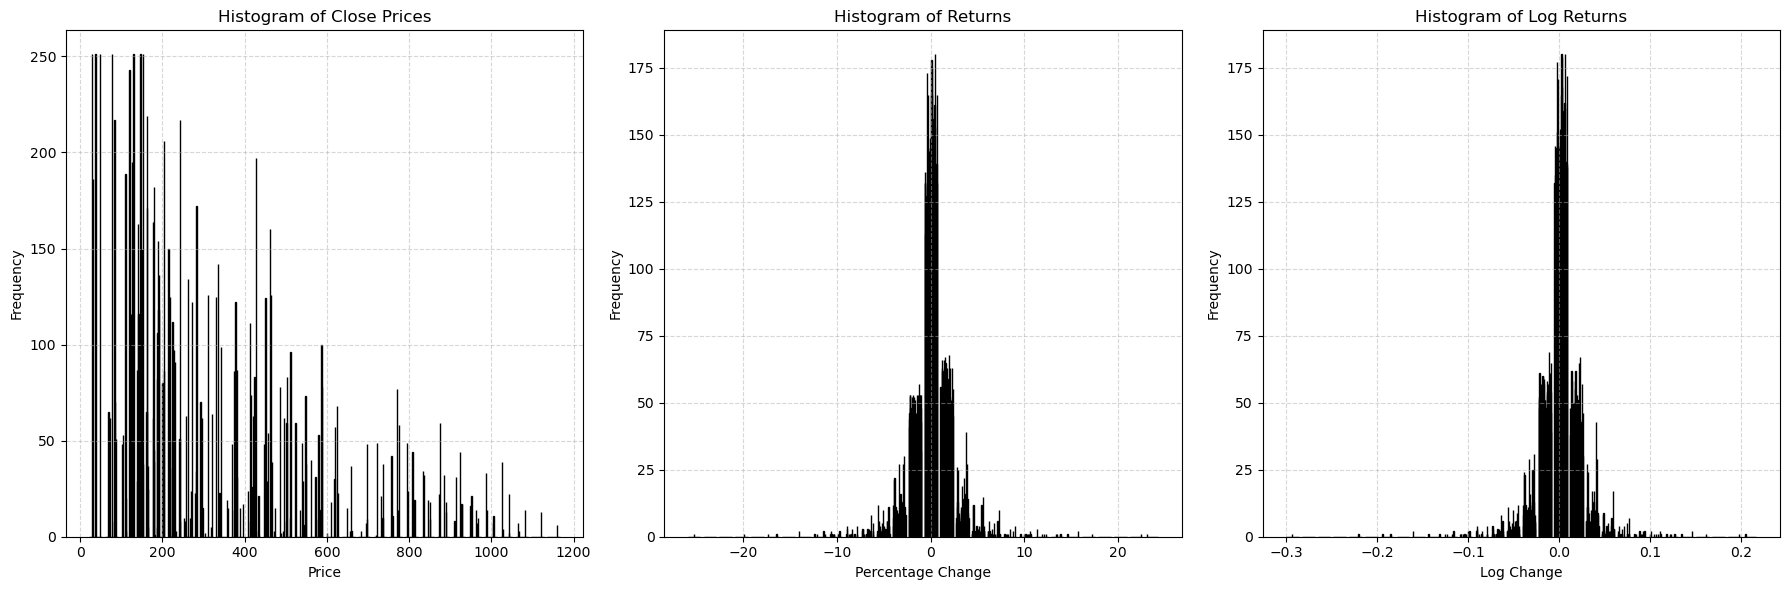

In [9]:
# Create a figure and two subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# First subplot (left side)
axes[0].hist(close_prices, bins=30, edgecolor='black')
axes[0].set_title('Histogram of Close Prices')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, linestyle='--', alpha=0.5)

# Second subplot (right side)
axes[1].hist(returns, bins=30, edgecolor='black')
axes[1].set_title('Histogram of Returns')
axes[1].set_xlabel('Percentage Change')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, linestyle='--', alpha=0.5)

# Third subplot (right side)
axes[2].hist(log_returns, bins=30, edgecolor='black')
axes[2].set_title('Histogram of Log Returns')
axes[2].set_xlabel('Log Change')
axes[2].set_ylabel('Frequency')
axes[2].grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping of labels
plt.show()

The histograms of adjusted closing prices and percentage returns reveal distinct statistical characteristics of the dataset.

1. Adjusted Closing Prices: The histogram exhibits a right-skewed (positively skewed) distribution, indicating that while most stock prices cluster at lower values, a few stocks have significantly higher prices. This skewness suggests a long right tail, which is characteristic of financial data where a few large-cap stocks (e.g., AMZN, BRK-B) have disproportionately high prices compared to smaller-cap stocks.

2. Percentage Returns: The histogram of daily percentage returns appears approximately normally distributed, with most values concentrated around zero. This suggests that stock returns exhibit symmetry, with gains and losses distributed fairly evenly around the mean. This aligns with the fundamental assumption in many financial models, such as the log-normal distribution of prices and the normality of short-term returns under the Efficient Market Hypothesis.

# Statistical Interpretation:
The right-skewness in prices implies that using raw price values in models can lead to misleading conclusions due to the large variation in scale across stocks.
The near-normal distribution of percentage returns suggests that using returns instead of prices provides a stationary and scale-independent measure of stock performance, making it more suitable for statistical modeling and risk analysis.

---

# Creating New Features
- Daily log returns
- Daily risk (standard deviation)

In [10]:
# Assign back to the original dataframe under a new column level
log_returns.columns = pd.MultiIndex.from_product([['Log Returns'], log_returns.columns])  # Add new top-level index

In [11]:
# Merge with the original dataframe
data = data.join(log_returns)

In [12]:
data['Log Returns'].head()

,AAPL,ABBV,ACN,ADBE,AMD,AMZN,AVGO,AXP,BLK,BRK-B,...,PFE,PG,PM,TMO,TSLA,TXN,UNH,UNP,V,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-14,-0.004821,0.006500,0.022269,0.004592,0.040892,0.013780,0.008409,0.005849,0.009377,0.009780,...,0.005178,-0.004104,0.000336,0.017795,0.025167,0.006482,0.000174,0.018156,0.006325,-0.004946
2024-02-15,-0.001576,0.012364,0.001428,-0.023798,-0.010916,-0.006925,0.002255,0.007699,0.015978,0.011894,...,0.014647,0.008828,-0.002694,0.000547,0.060353,0.017830,0.007593,0.001758,0.012246,0.028256
2024-02-16,-0.008466,0.005084,-0.005479,-0.077041,-0.016485,-0.001709,-0.015607,0.000141,-0.005088,0.006276,...,0.003991,0.003179,0.007501,-0.001332,-0.002498,-0.002056,0.001285,-0.015931,-0.008650,0.000000
2024-02-20,-0.004122,-0.009852,-0.017832,-0.008727,-0.048189,-0.014439,-0.015316,-0.000329,0.005163,0.002853,...,-0.001087,0.006329,-0.000111,0.000548,-0.031447,0.014608,-0.000940,0.002228,-0.012317,-0.009493


In [13]:
#Calculate the standard deviation of the entire dataset
# std_dev_entire = data['Log Returns'].std().sort_values(ascending=False)
# std_dev_entire.plot(kind='bar', figsize=(12,6))
# plt.title('Population Standard Deviation of Assets')
# plt.xlabel('Assets')
# plt.ylabel('Standard Deviation')
# plt.show()

In [ ]:
rolling_std_dev = data['Log Returns'].rolling(window=5).std()
print(rolling_std_dev)

                AAPL      ABBV       ACN      ADBE       AMD      AMZN  \
Date                                                                     
2024-02-13       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-14       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-15       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-16       NaN       NaN       NaN       NaN       NaN       NaN   
2024-02-20       NaN       NaN       NaN       NaN       NaN       NaN   
...              ...       ...       ...       ...       ...       ...   
2025-02-06  0.020044  0.019885  0.018626  0.009230  0.039185  0.017401   
2025-02-07  0.022129  0.016884  0.018284  0.004753  0.039131  0.025263   
2025-02-10  0.016082  0.008434  0.018302  0.020060  0.043389  0.027616   
2025-02-11  0.016346  0.009016  0.016826  0.020613  0.034365  0.024687   
2025-02-12  0.018137  0.008428  0.013680  0.019080  0.020164  0.023555   

                AVGO       AXP       

In [15]:
# Assign back to the original dataframe under a new column level
rolling_std_dev.columns = pd.MultiIndex.from_product([['Daily Risk'], rolling_std_dev.columns])  # Add new top-level index

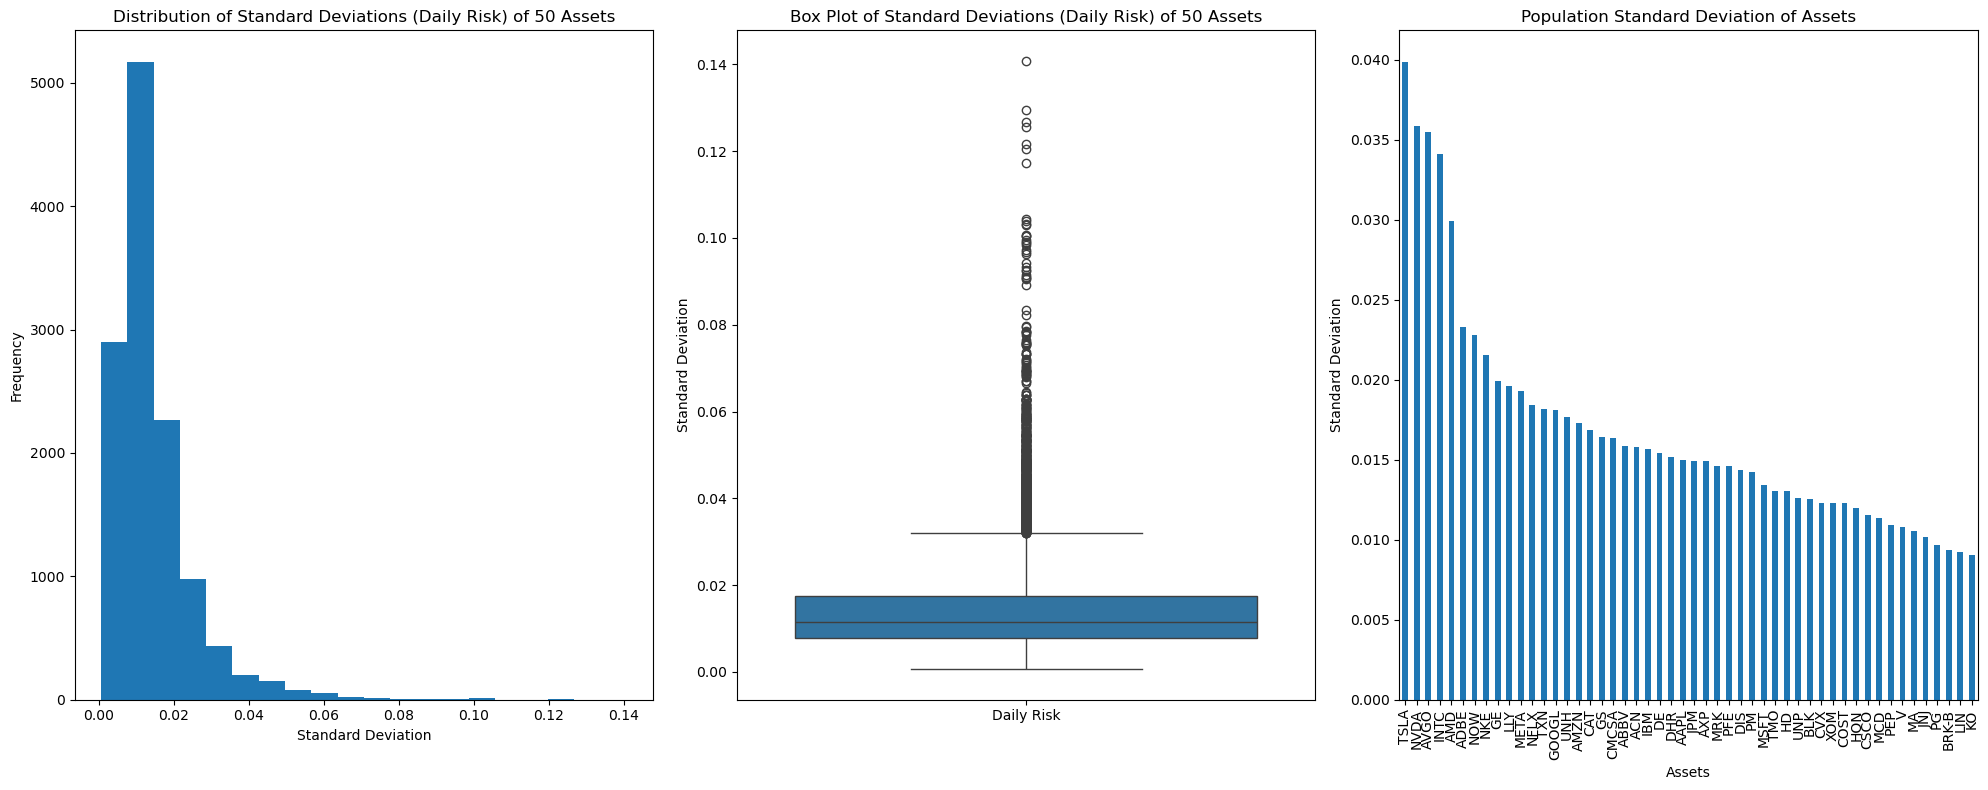

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
std_dev_entire = data['Log Returns'].std().sort_values(ascending=False)

axes[0].hist(rolling_std_dev.values.flatten(), bins=20)
axes[0].set_title('Distribution of Standard Deviations (Daily Risk) of 50 Assets')
axes[0].set_xlabel('Standard Deviation')
axes[0].set_ylabel('Frequency')

sns.boxplot(rolling_std_dev, ax=axes[1])
axes[1].set_title('Box Plot of Standard Deviations (Daily Risk) of 50 Assets')
axes[1].set_ylabel('Standard Deviation')

std_dev_entire.plot(kind='bar', ax=axes[2])
axes[2].set_title('Population Standard Deviation of Assets')
axes[2].set_xlabel('Assets')
axes[2].set_ylabel('Standard Deviation')

plt.tight_layout()
plt.show()

# Intuition
1. Most assets have low daily risk (standard deviation): The majority of the assets have relatively small variations in price, and thus their standard deviations are lower.

2. A few assets have high daily risk (standard deviation): There are some assets with much higher volatility, but these are fewer in number. These assets' returns deviate much more from their mean, which shows up as the right tail of the histogram.

The skewness in volatility should be accounted for during random portfolio generation. If randomly sampled from assets without considering skewness, you might create portfolios that are riskier than expected.
Give lower-risk assets a higher probability of selection, Instead of equal probability, adjust selection based on risk—low-volatility assets get chosen more often.

In [17]:
# Merge with the original dataframe
data = data.join(rolling_std_dev)

In [18]:
data['Daily Risk'].head(10)

,AAPL,ABBV,ACN,ADBE,AMD,AMZN,AVGO,AXP,BLK,BRK-B,...,PFE,PG,PM,TMO,TSLA,TXN,UNH,UNP,V,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-21,0.004690,0.008769,0.014766,0.032261,0.031954,0.011513,0.010934,0.006000,0.007752,0.003628,...,0.005821,0.006110,0.005546,0.007998,0.034108,0.007724,0.003310,0.013849,0.010585,0.016511
2024-02-22,0.007638,0.009170,0.017239,0.031040,0.057112,0.019186,0.031648,0.008473,0.007794,0.004819,...,0.007195,0.004332,0.005505,0.006457,0.033316,0.007621,0.004206,0.012663,0.015292,0.015872
2024-02-23,0.008974,0.008085,0.018685,0.038932,0.058901,0.018272,0.032195,0.008050,0.006313,0.004438,...,0.004628,0.004253,0.003948,0.006159,0.020066,0.009954,0.003632,0.012861,0.014712,0.012018
2024-02-26,0.008791,0.007988,0.018187,0.015813,0.058276,0.018249,0.030088,0.008903,0.007904,0.012601,...,0.010959,0.006271,0.008829,0.006411,0.029234,0.009444,0.004569,0.013199,0.013537,0.012130


In [19]:
data['Log Returns'].head(10)

,AAPL,ABBV,ACN,ADBE,AMD,AMZN,AVGO,AXP,BLK,BRK-B,...,PFE,PG,PM,TMO,TSLA,TXN,UNH,UNP,V,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-14,-0.004821,0.006500,0.022269,0.004592,0.040892,0.013780,0.008409,0.005849,0.009377,0.009780,...,0.005178,-0.004104,0.000336,0.017795,0.025167,0.006482,0.000174,0.018156,0.006325,-0.004946
2024-02-15,-0.001576,0.012364,0.001428,-0.023798,-0.010916,-0.006925,0.002255,0.007699,0.015978,0.011894,...,0.014647,0.008828,-0.002694,0.000547,0.060353,0.017830,0.007593,0.001758,0.012246,0.028256
2024-02-16,-0.008466,0.005084,-0.005479,-0.077041,-0.016485,-0.001709,-0.015607,0.000141,-0.005088,0.006276,...,0.003991,0.003179,0.007501,-0.001332,-0.002498,-0.002056,0.001285,-0.015931,-0.008650,0.000000
2024-02-20,-0.004122,-0.009852,-0.017832,-0.008727,-0.048189,-0.014439,-0.015316,-0.000329,0.005163,0.002853,...,-0.001087,0.006329,-0.000111,0.000548,-0.031447,0.014608,-0.000940,0.002228,-0.012317,-0.009493
2024-02-21,0.004177,-0.003477,-0.005637,-0.006275,-0.008485,0.008997,0.000734,-0.007558,0.009155,0.005145,...,0.002895,0.011853,0.010321,0.008556,0.005199,0.008200,0.001745,0.016772,0.005834,0.020232
2024-02-22,0.011181,0.009151,0.028409,-0.001766,0.101604,0.034913,0.061188,0.014593,0.009871,0.014338,...,-0.004346,0.000997,0.006822,0.013725,0.013463,0.008194,0.008641,0.012613,0.024943,-0.000859
2024-02-23,-0.010085,0.007553,0.016056,0.029094,-0.029803,0.002346,-0.006558,0.002660,0.000184,0.004950,...,0.007594,0.002923,0.004049,0.007501,-0.027944,-0.010574,0.001405,0.009386,-0.000529,-0.008821
2024-02-26,-0.007479,0.004035,0.000424,0.012640,-0.002893,-0.001487,0.009795,0.011124,-0.009336,-0.019556,...,-0.021115,-0.005043,-0.012529,-0.002180,0.037974,0.003720,-0.003648,-0.016760,0.001937,0.003941


In [20]:
data.isnull().sum().sort_values(ascending=False)

Daily Risk  DIS      5
            DHR      5
            DE       5
            CVX      5
            CSCO     5
                    ..
High        COST     0
            CMCSA    0
            CAT      0
            BRK-B    0
            BLK      0
Length: 400, dtype: int64

---

# Cleaning Data and Preprocessing
- Its ideal to drop the missing values generated by the log returns and daily risk columns since using other methods like backward fill uses future data to estimate past values.(bfill may be useful when filling timestamps).
- Forward fill can be used but in this case the missing data is at the startof the dataset and not at the very end hence it can't work in this case.
- In this case the best approach may be to drop the missing values using dropna() ensuring all calculations start on a level playing field.

In [21]:
# Drop rows with missing data
data = data.dropna()

In [22]:
data.isnull().sum().sort_values(ascending=False)

Daily Risk  MRK     0
            META    0
            MCD     0
            MA      0
            LLY     0
                   ..
Adj Close   AMD     0
            ADBE    0
            ACN     0
            ABBV    0
            AAPL    0
Length: 400, dtype: int64

In [23]:
data.describe()

Adj Close                                                              \
             AAPL        ABBV         ACN        ADBE         AMD        AMZN   
count  246.000000  246.000000  246.000000  246.000000  246.000000  246.000000   
mean   212.435787  175.624211  338.467568  504.091950  152.281016  193.234025   
std     25.855926   12.532594   28.699676   43.617962   21.434300   19.514052   
min    164.224548  150.744324  279.392517  405.920013  107.559998  161.020004   
25%    189.211575  165.301147  313.550537  474.495010  138.327507  179.567501   
50%    222.280777  173.825798  341.591583  503.684998  153.879997  186.404999   
75%    229.615040  187.934013  360.987488  538.662521  164.612503  202.382500   
max    258.735504  201.965424  398.250000  586.549988  211.380005  242.059998   

                                                        ...  Daily Risk  \
             AVGO         AXP          BLK       BRK-B  ...         PFE   
count  246.000000  246.000000   246.000000  246.000000  ...  246.000000   
mean   165.197716  257.304920   885.799052  437.449554  ...    0.013490   
std     33.600538   32.369606   106.668538   25.711531  ...    0.006087   
min    119.376137  208.577591   734.400391  396.730011  ...    0.002720   
25%    137.192993  230.705238   788.775345  410.325005  ...    0.009371   
50%    162.929604  248.330719   856.796783  442.475006  ...    0.012468   
75%    176.302624  286.743340   995.838852  459.799988  ...    0.016945   
max    249.331955  325.869995  1075.500000  483.079987  ...    0.035066   

                                                                               \
               PG          PM         TMO        TSLA         TXN         UNH   
count  246.000000  246.000000  246.000000  246.000000  246.000000  246.000000   
mean     0.008518    0.011269    0.011222    0.035435    0.017006    0.014667   
std      0.004923    0.008752    0.005862    0.017577    0.008083    0.009489   
min      0.002063    0.002052    0.002581    0.004350    0.003161    0.003050   
25%      0.005202    0.006437    0.007007    0.023776    0.010780    0.008251   
50%      0.007216    0.009013    0.010438    0.031887    0.015064    0.011477   
75%      0.010822    0.013009    0.013323    0.043155    0.021390    0.019458   
max      0.032454    0.048569    0.038211    0.094121    0.043069    0.044453   

                                           
              UNP           V         XOM  
count  246.000000  246.000000  246.000000  
mean     0.011188    0.009602    0.011186  
std      0.005743    0.004896    0.004725  
min      0.002730    0.002522    0.001564  
25%      0.007316    0.006522    0.007603  
50%      0.010125    0.008441    0.010625  
75%      0.013826    0.010559    0.014704  
max      0.033318    0.029542    0.022706  

[8 rows x 400 columns]

In [24]:
data.columns.get_level_values(0).unique()

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Log Returns',
       'Daily Risk'],
      dtype='object')

In [25]:
data.shape

(246, 400)

---
# Generate random Weights

In [ ]:
n_assets = 50  # Number of assets
n_portfolios = 1000  # Number of random portfolios

# Initialize an empty array to store portfolio weights
random_portfolios = np.zeros((n_portfolios, n_assets))

random_portfolios.shape

(1000, 50)

In [ ]:
for i in range(n_portfolios):
    weights = np.random.rand(n_assets)  # Generate random values
    # Normalize to sum to 1, This divides each element by the sum of all elements, it is the shorthand for weights = weights / np.sum(weights)
    weights /= np.sum(weights)  
    # copies the weights array into the i-th row of random_portfolios.
    random_portfolios[i] = weights  

# Check if all portfolios sum to 1
print(random_portfolios[:5], np.sum(random_portfolios, axis=1)[:5])  # Show first 5 portfolios

[[3.47859689e-02 4.91982303e-05 1.82002361e-02 1.38469160e-04
  3.69813595e-02 2.23828462e-02 3.32292649e-02 1.26887968e-02
  3.00321499e-02 1.09288977e-02 2.58331385e-02 1.08545887e-02
  3.70613778e-02 2.66189823e-03 9.10098286e-04 2.55625638e-02
  2.88440714e-02 2.90377172e-02 9.26245327e-03 2.29618912e-02
  2.47261609e-02 2.55299302e-02 1.05411995e-02 3.21234031e-02
  2.24441764e-02 2.08106344e-02 2.65551490e-02 9.68206238e-03
  2.29791476e-02 1.97576041e-02 2.58983320e-02 3.71911971e-03
  2.01427171e-02 7.69320253e-03 1.12160433e-02 3.72119648e-02
  3.57390289e-02 2.19220320e-02 3.05359263e-02 2.68133645e-02
  1.14549885e-02 8.04139633e-03 1.26504182e-03 3.30027887e-03
  3.18407974e-02 3.75026810e-02 6.20073567e-03 3.40815102e-02
  2.21712157e-02 1.56931702e-02]
 [1.39691338e-02 7.41218514e-03 3.05703523e-02 1.69504704e-02
  1.42983361e-02 1.20205343e-02 1.44132053e-03 1.04051562e-02
  1.80479087e-02 2.24923592e-02 2.75771282e-02 2.09250849e-02
  2.89202130e-02 1.73497241e-02 2.718

---
# Simulate Portfolio Performance
1. Calculate expected returns. 
    $$
    E(R_p)=
    \sum_{i=1}^{n} w_i .E(R_i)   
    $$
    Where
    $$
    E(R_i) = 
    \frac{1}{n}\sum_{i=1}^{n}\text{Log Returns}
    $$
2. Calculate covariance.
    $$
    \text{cov}(R_i,R_j) = 
    \frac{1}{N - 1}\sum_{n=1}^{N}(R_\text{i,n} - \bar{R_i})(R_\text{j,n} - \bar{R_j})
    $$ 

3. Calculate expected risk (volatility).
    $$ 
    \sigma_p = \sqrt{\sum_{i=1}^{N}w_i^2 \sigma_i^2 + \sum_{\substack{j=i \\ j \neg i}}^{n}w_i.w_j.\text{cov}(R_i,R_j)}
    $$
    - The first sum accounts for the variances of individual assets $(\sigma_i^2)$ weighted by $(w_i^2)$
    - The second sum accounts for covariances between different assets $(\text{cov}(R_i,R_j))$, weighted by $w_i, w_j$
    $$
    \sigma_p = \sqrt{\mathbf{w}^T \mathbf{\Sigma} \mathbf{w}}
    $$
    - Where:
        - $w$ is a (1000, 50) matrix (each row is a random portfolio's weight)
        - $\mathbf{\Sigma}$ is a (50,50) covariance matrix
        - The result is a (1000, 1) matrix (one risk value per portfolio)
    - Intuition
    $$
    \mathbf{w} = 
    \begin{bmatrix}
    w_1 \\w_2 \\w_3 \\\vdots \\w_{n}
    \end{bmatrix}
    $$
    
    $$ 
    \mathbf{\Sigma} =
    \begin{bmatrix}
        \sigma_1^2 & \text{cov}(R_1, R_2) & \dots & \text{cov}(R_1, R_N) \\
        \text{cov}(R_2, R_1) & \sigma_2^2 & \dots & \text{cov}(R_2, R_N) \\
        \vdots & \vdots & \ddots & \vdots \\
        \text{cov}(R_N, R_1) & \text{cov}(R_N, R_2) & \dots & \sigma_N^2
    \end{bmatrix}
    $$ 
    
    $$
    \mathbf{w^T\Sigma} =
    \begin{bmatrix}
    w_1 & w_2 & \cdot & w_n
    \end{bmatrix}
    \begin{bmatrix}
        \sigma_1^2 & \text{cov}(R_1, R_2) & \dots & \text{cov}(R_1, R_N) \\
        \text{cov}(R_2, R_1) & \sigma_2^2 & \dots & \text{cov}(R_2, R_N) \\
        \vdots & \vdots & \ddots & \vdots \\
        \text{cov}(R_N, R_1) & \text{cov}(R_N, R_2) & \dots & \sigma_N^2
    \end{bmatrix}    
    $$
    Each element of the resulting row vector is computed as:
    $$
    \mathbf{w^T\Sigma} =
    \sum_{i=1}^{N} w_i . \text{cov}(R_i,R_j)
    $$

    $$
    \mathbf{w^T\Sigma w} =
    \begin{bmatrix}
        \sum_{i=1}^{N} w_i \cdot \text{cov}(R_i,R_1) & \sum_{i=1}^{N} w_i \cdot \text{cov}(R_i,R_2) & \dots & \sum_{i=1}^{N} w_i \cdot \text{cov}(R_i,R_N)
    \end{bmatrix}
    \begin{bmatrix}
        w_1 \\w_2 \\\vdots \\w_{n}
    \end{bmatrix}    
    $$
    This multiplication is a dot product, so the result is a scalar (a single number):
    $$
    \mathbf{w^T\Sigma w} =
    \sum_{j=1}^{N}(\sum_{i=1}^{N}w_i \cdot \text{cov}(R_i,R_j)) \cdot w_j
    $$
    The double summation can be rewritten by combining the terms:
    $$
    \mathbf{w^T\Sigma w} =
    \sum_{j=1}^{N}\sum_{i=1}^{N}(w_j \cdot w_i \cdot \text{cov}(R_i, R_j))
    $$
    - This is the explicit form of the matrix multiplication. It sums over all possible pairs of assets ($i$ and $j$), weighting their covariances by the product of their weights
    $(w_i, w_j)$
    - The double summation $\sum_{j=1}^{N}\sum_{i=1}^{N}(w_j \cdot w_i \cdot \text{cov}(R_i, R_j))$ include:
        - Diagonal terms $(i = j)$: hese are the terms where $\text{cov}(R_i, R_j) = \sigma_I^2$ so they become $w_i^2 \cdot \sigma_i^2$
        - Off-diagonal terms $(i \neg j)$: These are the terms where $\text{cov}(R_i, R_j)$ captures the covariance between different assets.
    - Thus, the matrix multiplication naturally includes both the individual asset risks $(w_i^2 \sigma_i^2$) and the interactions between assets $(w_iw_j\text{cov}(R_i,R_j))$, matching the expanded formula:
    $$
    \sigma_p =
    \sqrt{sum_{i=1}^{N}w_i^2 \sigma_i^2 + \sum_{\substack{j=i \\ j \neg i}}^{n}w_i.w_j.\text{cov}(R_i,R_j)}
    $$

In [28]:
# Calculate expected returns of individual assets
expected_returns = data['Log Returns'].mean()
expected_returns.shape

(50,)

In [29]:
print(expected_returns)

AAPL     0.001100
ABBV     0.000526
ACN      0.000330
ADBE    -0.000642
AMD     -0.001602
AMZN     0.001280
AVGO     0.002721
AXP      0.001533
BLK      0.000904
BRK-B    0.000598
CAT      0.000529
CMCSA   -0.000592
COST     0.001582
CSCO     0.001178
CVX      0.000151
DE       0.001231
DHR     -0.000809
DIS      0.000029
GE       0.002342
GOOGL    0.001085
GS       0.002225
HD       0.000570
HON      0.000208
IBM      0.001486
INTC    -0.002736
JNJ      0.000028
JPM      0.001827
KO       0.000626
LIN      0.000255
LLY      0.000606
MA       0.000929
MCD      0.000300
META     0.001764
MRK     -0.001503
MSFT     0.000085
NFLX     0.002358
NKE     -0.001384
NOW      0.001082
NVDA     0.002585
PEP     -0.000514
PFE     -0.000078
PG       0.000374
PM       0.002289
TMO     -0.000065
TSLA     0.002244
TXN      0.000522
UNH      0.000112
UNP      0.000111
V        0.001026
XOM      0.000313
dtype: float64


- random_portfolios is a (1000 × num_assets) matrix, where each row is a different portfolio’s weights.
- expected_returns is a (num_assets × 1) column vector of asset expected returns.
- The @ operator performs matrix multiplication, resulting in a (1000 × 1) array, where each row is the expected return of a portfolio.

In [30]:
portfolio_expected_returns = random_portfolios @ expected_returns
portfolio_expected_returns.shape

(1000,)

In [31]:
print(portfolio_expected_returns)

[0.00071823 0.00061323 0.00054652 0.0006507  0.00061308 0.00068302
 0.00061866 0.00048826 0.00066907 0.0005722  0.00062115 0.00068929
 0.00074146 0.00055301 0.00068977 0.0006497  0.00050014 0.00059426
 0.00045347 0.00066719 0.00065179 0.00050098 0.00058567 0.00057519
 0.000635   0.00056336 0.00071556 0.00051432 0.00057486 0.00069397
 0.00072856 0.00053536 0.00063425 0.00075809 0.00075609 0.00059777
 0.00063911 0.00060296 0.00056727 0.00074964 0.00066507 0.00053285
 0.00065958 0.00077726 0.00073929 0.00077086 0.00060791 0.00071707
 0.00071291 0.00075279 0.00063948 0.00076711 0.00069148 0.00066805
 0.00054963 0.00062495 0.00071902 0.00047637 0.00062132 0.00062468
 0.00054201 0.00055302 0.00070623 0.00058686 0.00054512 0.0004863
 0.00077417 0.00047392 0.00055177 0.00079205 0.00052945 0.00054237
 0.00059663 0.00065666 0.00070099 0.00061785 0.00046962 0.00040029
 0.00062639 0.00053817 0.00066926 0.00057675 0.00066335 0.00069296
 0.00055495 0.00065226 0.00059969 0.000693   0.00046788 0.00058

In [ ]:
# Calculate covariance matrix for the portfolio using Log Returns.
cov_matrix = data['Log Returns'].cov()
cov_matrix.head()

,AAPL,ABBV,ACN,ADBE,AMD,AMZN,AVGO,AXP,BLK,BRK-B,...,PFE,PG,PM,TMO,TSLA,TXN,UNH,UNP,V,XOM
AAPL,0.000227,-0.000002,0.000037,0.000061,0.000121,0.000088,0.000125,0.000022,0.000053,0.000027,...,0.000017,-0.000002,0.000011,0.000005,0.000214,0.000075,1.126235e-07,0.000009,0.000020,-4.682859e-07
ABBV,-0.000002,0.000254,0.000009,0.000028,-0.000044,-0.000001,-0.000043,0.000022,0.000017,0.000034,...,0.000071,0.000039,0.000061,0.000061,-0.000086,0.000013,4.193804e-05,0.000040,0.000030,4.093811e-05
ACN,0.000037,0.000009,0.000249,0.000106,0.000074,0.000066,0.000034,0.000046,0.000029,0.000040,...,0.000033,0.000017,0.000007,0.000044,0.000024,0.000041,4.128994e-05,0.000047,0.000048,-1.514895e-07
ADBE,0.000061,0.000028,0.000106,0.000527,0.000099,0.000155,0.000187,0.000076,0.000049,0.000038,...,0.000009,-0.000008,0.000004,0.000045,0.000133,0.000062,3.604023e-05,0.000046,0.000051,5.091663e-06
AMD,0.000121,-0.000044,0.000074,0.000099,0.000891,0.000179,0.000521,0.000100,0.000105,0.000025,...,-0.000023,-0.000040,-0.000043,0.000024,0.000368,0.000263,5.792586e-06,0.000040,0.000024,2.590626e-05


In [34]:
# Compute portfolio variance
random_portfolios_t = random_portfolios.T  # (50, 1000)
random_portfolios_t.shape

(50, 1000)

In [38]:
'''
Using np.diag to get the diagonal values of the final portfolio risk matrix as the off-diagonal values are irrelevant and we only 
need a scalar value per portfolio.
'''
portfolio_variances = np.diag(random_portfolios @ cov_matrix @ random_portfolios_t)

In [39]:
# Print first 10 portfolio variances
print(portfolio_variances[:10])

[7.45908851e-05 5.28569072e-05 5.13218631e-05 5.25840484e-05
 4.82636828e-05 5.22505765e-05 5.41589132e-05 6.63377707e-05
 5.55131529e-05 5.75699760e-05]


In [40]:
portfolio_variances.shape

(1000,)